In [1]:
#데이터 구성: Series,DataFrame
import pandas as pd

#행렬 연산
import numpy as np

#데이터 시각
import matplotlib.pyplot as plt
import seaborn as sns

#한글깨짐 방지
import matplotlib.font_manager as fm 
font_list=[font.name for font in fm.fontManager.ttflist]
font_list
plt.rcParams['font.family']='NanumBarunGothic'

### 국민건강검진 결과(표본) - 기본 검진 + 혈액 검사

In [2]:
#데이터 불러오기 
df_h = pd.read_csv('/home/piai/Desktop/빅데이터과제/A3_보험_DataSet/insu_nh_h_screen.csv',encoding = 'EUC-KR')

/home/piai/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (10,11,12,13,14,15,17,18,19,20,21) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df_h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177346 entries, 0 to 177345
Data columns (total 24 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   no              177346 non-null  int64 
 1   gender          177346 non-null  int64 
 2   age_group       177346 non-null  object
 3   height_group    177346 non-null  object
 4   weight_group    177346 non-null  object
 5   waist           177346 non-null  object
 6   eyesight_left   177346 non-null  object
 7   eyesight_right  177346 non-null  object
 8   hearing_left    177346 non-null  object
 9   hearing_right   177346 non-null  object
 10  bp_max          177346 non-null  object
 11  bp_min          177346 non-null  object
 12  bp_gluc         177346 non-null  object
 13  bt_chol         177346 non-null  object
 14  bt_trig         177346 non-null  object
 15  bt_hdl          177346 non-null  object
 16  bt_ldl          177346 non-null  object
 17  bt_mch          177346 non-nu

In [4]:
# 결측 처리 
df_h.isnull().sum(axis=0)

no                0
gender            0
age_group         0
height_group      0
weight_group      0
waist             0
eyesight_left     0
eyesight_right    0
hearing_left      0
hearing_right     0
bp_max            0
bp_min            0
bp_gluc           0
bt_chol           0
bt_trig           0
bt_hdl            0
bt_ldl            0
bt_mch            0
bt_crea           0
bt_ast            0
bt_alt            0
bt_rgpt           0
smoke_flag        0
drinking_flag     0
dtype: int64

### 결측치가 "."로 표시되어 있다. 

In [5]:
# 결측치 변환
df_h.replace(".",np.nan,inplace=True)

건강 검진에서 일반 검진에서 혈액 검사를 대체할 수 있는 요소 발견하기 


일반 검진 : 2-12, 23-24

혈액 검사 : 13-22

In [6]:
df_h.head()

,no,gender,age_group,height_group,weight_group,waist,eyesight_left,eyesight_right,hearing_left,hearing_right,...,bt_trig,bt_hdl,bt_ldl,bt_mch,bt_crea,bt_ast,bt_alt,bt_rgpt,smoke_flag,drinking_flag
0,1,2,55~59,155,55,67.5,0.9,1,1,1,...,97,52,88,13.4,0.6,21,24,30,1,1
1,2,1,35~39,170,70,84.8,1.2,1,1,1,...,139,46,136,17.1,0.9,25,30,33,2,1
2,3,1,35~39,170,70,86,1,1,1,1,...,82,50,123,14.7,0.7,43,46,88,1,1
3,4,2,40~44,155,50,77,1.5,1.5,1,1,...,55,47,117,13.4,0.6,17,8,10,1,0
4,5,2,40~44,165,55,66,1,1,1,1,...,65,64,104,10.3,0.7,39,43,18,1,1


### 타입 변환하기

In [7]:
df_h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177346 entries, 0 to 177345
Data columns (total 24 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   no              177346 non-null  int64 
 1   gender          177346 non-null  int64 
 2   age_group       177346 non-null  object
 3   height_group    177301 non-null  object
 4   weight_group    177299 non-null  object
 5   waist           177251 non-null  object
 6   eyesight_left   177302 non-null  object
 7   eyesight_right  177302 non-null  object
 8   hearing_left    177310 non-null  object
 9   hearing_right   177309 non-null  object
 10  bp_max          177333 non-null  object
 11  bp_min          177333 non-null  object
 12  bp_gluc         177335 non-null  object
 13  bt_chol         177335 non-null  object
 14  bt_trig         177335 non-null  object
 15  bt_hdl          177335 non-null  object
 16  bt_ldl          177036 non-null  object
 17  bt_mch          177332 non-nu

### 연속형 변수 

In [8]:
df_h_numeric=df_h.iloc[:,0:22]

In [9]:
df_h_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177346 entries, 0 to 177345
Data columns (total 22 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   no              177346 non-null  int64 
 1   gender          177346 non-null  int64 
 2   age_group       177346 non-null  object
 3   height_group    177301 non-null  object
 4   weight_group    177299 non-null  object
 5   waist           177251 non-null  object
 6   eyesight_left   177302 non-null  object
 7   eyesight_right  177302 non-null  object
 8   hearing_left    177310 non-null  object
 9   hearing_right   177309 non-null  object
 10  bp_max          177333 non-null  object
 11  bp_min          177333 non-null  object
 12  bp_gluc         177335 non-null  object
 13  bt_chol         177335 non-null  object
 14  bt_trig         177335 non-null  object
 15  bt_hdl          177335 non-null  object
 16  bt_ldl          177036 non-null  object
 17  bt_mch          177332 non-nu

In [10]:
df_h_numeric=df_h_numeric.drop(['hearing_left','hearing_right','age_group','gender'], axis=1)

In [11]:
df_h_numeric

,no,height_group,weight_group,waist,eyesight_left,eyesight_right,bp_max,bp_min,bp_gluc,bt_chol,bt_trig,bt_hdl,bt_ldl,bt_mch,bt_crea,bt_ast,bt_alt,bt_rgpt
0,1,155,55,67.5,0.9,1,138,90,76,160,97,52,88,13.4,0.6,21,24,30
1,2,170,70,84.8,1.2,1,115,79,93,210,139,46,136,17.1,0.9,25,30,33
2,3,170,70,86,1,1,122,72,91,189,82,50,123,14.7,0.7,43,46,88
3,4,155,50,77,1.5,1.5,108,68,89,175,55,47,117,13.4,0.6,17,8,10
4,5,165,55,66,1,1,118,77,84,181,65,64,104,10.3,0.7,39,43,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177341,177342,170,75,82,1.2,1.5,128,75,91,208,76,50,142,15.4,0.8,23,27,51
177342,177343,155,70,86,1.2,1,135,80,98,258,104,59,178,13.5,0.7,26,34,28
177343,177344,175,65,86,0.5,0.5,139,87,101,217,220,54,119,16.9,0.6,17,21,140
177344,177345,165,65,73,1.5,1.2,115,62,88,142,41,56,78,12.6,0.7,15,13,16


In [12]:
df_h_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177346 entries, 0 to 177345
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   no              177346 non-null  int64 
 1   height_group    177301 non-null  object
 2   weight_group    177299 non-null  object
 3   waist           177251 non-null  object
 4   eyesight_left   177302 non-null  object
 5   eyesight_right  177302 non-null  object
 6   bp_max          177333 non-null  object
 7   bp_min          177333 non-null  object
 8   bp_gluc         177335 non-null  object
 9   bt_chol         177335 non-null  object
 10  bt_trig         177335 non-null  object
 11  bt_hdl          177335 non-null  object
 12  bt_ldl          177036 non-null  object
 13  bt_mch          177332 non-null  object
 14  bt_crea         177335 non-null  object
 15  bt_ast          177335 non-null  object
 16  bt_alt          177334 non-null  object
 17  bt_rgpt         177335 non-nu

In [13]:
df_h_numeric=df_h_numeric.astype('float')

In [14]:
df_h_numeric.describe()

,no,height_group,weight_group,waist,eyesight_left,eyesight_right,bp_max,bp_min,bp_gluc,bt_chol,bt_trig,bt_hdl,bt_ldl,bt_mch,bt_crea,bt_ast,bt_alt,bt_rgpt
count,177346.000000,177301.000000,177299.000000,177251.000000,177302.000000,177302.000000,177333.000000,177333.000000,177335.000000,177335.000000,177335.000000,177335.000000,177036.000000,177332.000000,177335.000000,177335.000000,177334.000000,177335.000000
mean,88673.500000,162.197816,62.882504,80.996530,0.956035,0.954359,122.021040,75.667191,99.669298,195.115713,126.728751,58.466682,112.079023,14.172387,0.854609,25.535433,24.896303,35.279076
std,51195.524757,9.278617,12.859113,14.345662,0.590662,0.604966,14.835517,10.233458,23.095383,37.758240,100.793692,23.825463,34.565138,1.538694,0.563146,25.994541,23.688788,47.805575
min,1.000000,85.000000,25.000000,47.500000,0.100000,0.100000,71.000000,34.000000,24.000000,43.000000,4.000000,5.000000,1.000000,3.000000,0.100000,1.000000,1.000000,1.000000
25%,44337.250000,155.000000,55.000000,74.000000,0.700000,0.700000,111.000000,69.000000,88.000000,169.000000,71.000000,47.000000,88.000000,13.100000,0.700000,19.000000,14.000000,15.000000
50%,88673.500000,160.000000,60.000000,81.000000,1.000000,1.000000,120.000000,75.000000,95.000000,193.000000,102.000000,57.000000,110.000000,14.100000,0.800000,22.000000,19.000000,22.000000
75%,133009.750000,170.000000,70.000000,87.600000,1.200000,1.200000,131.000000,82.000000,104.000000,218.000000,151.000000,68.000000,133.000000,15.300000,1.000000,28.000000,28.000000,37.000000
max,177346.000000,195.000000,180.000000,999.000000,9.900000,9.900000,250.000000,160.000000,712.000000,1803.000000,4930.000000,7711.000000,1728.000000,21.400000,96.000000,5186.000000,2427.000000,999.000000


In [15]:
df_h_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177346 entries, 0 to 177345
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   no              177346 non-null  float64
 1   height_group    177301 non-null  float64
 2   weight_group    177299 non-null  float64
 3   waist           177251 non-null  float64
 4   eyesight_left   177302 non-null  float64
 5   eyesight_right  177302 non-null  float64
 6   bp_max          177333 non-null  float64
 7   bp_min          177333 non-null  float64
 8   bp_gluc         177335 non-null  float64
 9   bt_chol         177335 non-null  float64
 10  bt_trig         177335 non-null  float64
 11  bt_hdl          177335 non-null  float64
 12  bt_ldl          177036 non-null  float64
 13  bt_mch          177332 non-null  float64
 14  bt_crea         177335 non-null  float64
 15  bt_ast          177335 non-null  float64
 16  bt_alt          177334 non-null  float64
 17  bt_rgpt   

In [16]:
df_h_numeric.isnull().sum(axis=0)

no                  0
height_group       45
weight_group       47
waist              95
eyesight_left      44
eyesight_right     44
bp_max             13
bp_min             13
bp_gluc            11
bt_chol            11
bt_trig            11
bt_hdl             11
bt_ldl            310
bt_mch             14
bt_crea            11
bt_ast             11
bt_alt             12
bt_rgpt            11
dtype: int64

In [17]:
df_h_numeric.dropna()

,no,height_group,weight_group,waist,eyesight_left,eyesight_right,bp_max,bp_min,bp_gluc,bt_chol,bt_trig,bt_hdl,bt_ldl,bt_mch,bt_crea,bt_ast,bt_alt,bt_rgpt
0,1.0,155.0,55.0,67.5,0.9,1.0,138.0,90.0,76.0,160.0,97.0,52.0,88.0,13.4,0.6,21.0,24.0,30.0
1,2.0,170.0,70.0,84.8,1.2,1.0,115.0,79.0,93.0,210.0,139.0,46.0,136.0,17.1,0.9,25.0,30.0,33.0
2,3.0,170.0,70.0,86.0,1.0,1.0,122.0,72.0,91.0,189.0,82.0,50.0,123.0,14.7,0.7,43.0,46.0,88.0
3,4.0,155.0,50.0,77.0,1.5,1.5,108.0,68.0,89.0,175.0,55.0,47.0,117.0,13.4,0.6,17.0,8.0,10.0
4,5.0,165.0,55.0,66.0,1.0,1.0,118.0,77.0,84.0,181.0,65.0,64.0,104.0,10.3,0.7,39.0,43.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177341,177342.0,170.0,75.0,82.0,1.2,1.5,128.0,75.0,91.0,208.0,76.0,50.0,142.0,15.4,0.8,23.0,27.0,51.0
177342,177343.0,155.0,70.0,86.0,1.2,1.0,135.0,80.0,98.0,258.0,104.0,59.0,178.0,13.5,0.7,26.0,34.0,28.0
177343,177344.0,175.0,65.0,86.0,0.5,0.5,139.0,87.0,101.0,217.0,220.0,54.0,119.0,16.9,0.6,17.0,21.0,140.0
177344,177345.0,165.0,65.0,73.0,1.5,1.2,115.0,62.0,88.0,142.0,41.0,56.0,78.0,12.6,0.7,15.0,13.0,16.0


결측치 452개 제거 

### 명목형 변수 만들기


In [18]:
df_h_object=df_h.loc[:,['no','gender','age_group','hearing_left','hearing_right','smoke_flag','drinking_flag']]

In [19]:
df_h_object.astype(object)

,no,gender,age_group,hearing_left,hearing_right,smoke_flag,drinking_flag
0,1,2,55~59,1,1,1,1
1,2,1,35~39,1,1,2,1
2,3,1,35~39,1,1,1,1
3,4,2,40~44,1,1,1,0
4,5,2,40~44,1,1,1,1
...,...,...,...,...,...,...,...
177341,177342,1,30~34,1,1,3,1
177342,177343,2,60~64,1,1,1,0
177343,177344,1,50~54,1,1,3,1
177344,177345,2,20~24,1,1,3,0


In [20]:
df_h_object.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177346 entries, 0 to 177345
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   no             177346 non-null  int64 
 1   gender         177346 non-null  int64 
 2   age_group      177346 non-null  object
 3   hearing_left   177310 non-null  object
 4   hearing_right  177309 non-null  object
 5   smoke_flag     177325 non-null  object
 6   drinking_flag  177148 non-null  object
dtypes: int64(2), object(5)
memory usage: 9.5+ MB


### 연속형 변수간의 상관간계 파악 

/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


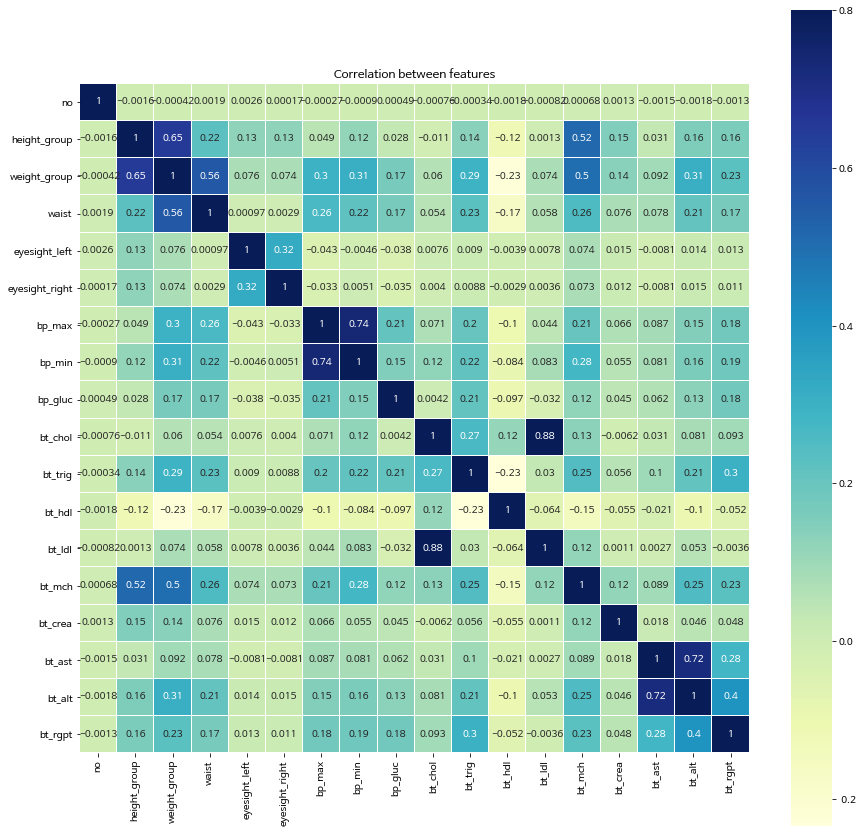

In [21]:
# heatmap을 활용한 상관관계 파악 
corr=df_h_numeric.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features');

In [22]:
df_result=pd.merge(df_h_numeric,df_h_object, on='no')

In [23]:
df_result

,no,height_group,weight_group,waist,eyesight_left,eyesight_right,bp_max,bp_min,bp_gluc,bt_chol,...,bt_crea,bt_ast,bt_alt,bt_rgpt,gender,age_group,hearing_left,hearing_right,smoke_flag,drinking_flag
0,1.0,155.0,55.0,67.5,0.9,1.0,138.0,90.0,76.0,160.0,...,0.6,21.0,24.0,30.0,2,55~59,1,1,1,1
1,2.0,170.0,70.0,84.8,1.2,1.0,115.0,79.0,93.0,210.0,...,0.9,25.0,30.0,33.0,1,35~39,1,1,2,1
2,3.0,170.0,70.0,86.0,1.0,1.0,122.0,72.0,91.0,189.0,...,0.7,43.0,46.0,88.0,1,35~39,1,1,1,1
3,4.0,155.0,50.0,77.0,1.5,1.5,108.0,68.0,89.0,175.0,...,0.6,17.0,8.0,10.0,2,40~44,1,1,1,0
4,5.0,165.0,55.0,66.0,1.0,1.0,118.0,77.0,84.0,181.0,...,0.7,39.0,43.0,18.0,2,40~44,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177341,177342.0,170.0,75.0,82.0,1.2,1.5,128.0,75.0,91.0,208.0,...,0.8,23.0,27.0,51.0,1,30~34,1,1,3,1
177342,177343.0,155.0,70.0,86.0,1.2,1.0,135.0,80.0,98.0,258.0,...,0.7,26.0,34.0,28.0,2,60~64,1,1,1,0
177343,177344.0,175.0,65.0,86.0,0.5,0.5,139.0,87.0,101.0,217.0,...,0.6,17.0,21.0,140.0,1,50~54,1,1,3,1
177344,177345.0,165.0,65.0,73.0,1.5,1.2,115.0,62.0,88.0,142.0,...,0.7,15.0,13.0,16.0,2,20~24,1,1,3,0


In [24]:
df_result["age_group"][df_result["age_group"]=='20~24']="20대"
df_result["age_group"][df_result["age_group"]=='25~29']="20대"
df_result["age_group"][df_result["age_group"]=='30~34']="30대"
df_result["age_group"][df_result["age_group"]=='35~39']="30대"
df_result["age_group"][df_result["age_group"]=='40~44']="40대"
df_result["age_group"][df_result["age_group"]=='45~49']="40대"
df_result["age_group"][df_result["age_group"]=='50~54']="50대"
df_result["age_group"][df_result["age_group"]=='55~59']="50대"
df_result["age_group"][df_result["age_group"]=='60~64']="60대"
df_result["age_group"][df_result["age_group"]=='65~69']="60대"
df_result["age_group"][df_result["age_group"]=='70~74']="70대"
df_result["age_group"][df_result["age_group"]=='75~79']="70대"
df_result["age_group"][df_result["age_group"]=='80~84']="80대"
df_result["age_group"][df_result["age_group"]=='85세+']="80대"

<ipython-input-24-03fc7fea88d4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_result["age_group"][df_result["age_group"]=='20~24']="20대"
<ipython-input-24-03fc7fea88d4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_result["age_group"][df_result["age_group"]=='25~29']="20대"
<ipython-input-24-03fc7fea88d4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_result["age_group"][df_result["age_group"]=='30~34']="30대"
<ipython-i

In [25]:
df_result

,no,height_group,weight_group,waist,eyesight_left,eyesight_right,bp_max,bp_min,bp_gluc,bt_chol,...,bt_crea,bt_ast,bt_alt,bt_rgpt,gender,age_group,hearing_left,hearing_right,smoke_flag,drinking_flag
0,1.0,155.0,55.0,67.5,0.9,1.0,138.0,90.0,76.0,160.0,...,0.6,21.0,24.0,30.0,2,50대,1,1,1,1
1,2.0,170.0,70.0,84.8,1.2,1.0,115.0,79.0,93.0,210.0,...,0.9,25.0,30.0,33.0,1,30대,1,1,2,1
2,3.0,170.0,70.0,86.0,1.0,1.0,122.0,72.0,91.0,189.0,...,0.7,43.0,46.0,88.0,1,30대,1,1,1,1
3,4.0,155.0,50.0,77.0,1.5,1.5,108.0,68.0,89.0,175.0,...,0.6,17.0,8.0,10.0,2,40대,1,1,1,0
4,5.0,165.0,55.0,66.0,1.0,1.0,118.0,77.0,84.0,181.0,...,0.7,39.0,43.0,18.0,2,40대,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177341,177342.0,170.0,75.0,82.0,1.2,1.5,128.0,75.0,91.0,208.0,...,0.8,23.0,27.0,51.0,1,30대,1,1,3,1
177342,177343.0,155.0,70.0,86.0,1.2,1.0,135.0,80.0,98.0,258.0,...,0.7,26.0,34.0,28.0,2,60대,1,1,1,0
177343,177344.0,175.0,65.0,86.0,0.5,0.5,139.0,87.0,101.0,217.0,...,0.6,17.0,21.0,140.0,1,50대,1,1,3,1
177344,177345.0,165.0,65.0,73.0,1.5,1.2,115.0,62.0,88.0,142.0,...,0.7,15.0,13.0,16.0,2,20대,1,1,3,0


In [26]:
df_result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177346 entries, 0 to 177345
Data columns (total 24 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   no              177346 non-null  float64
 1   height_group    177301 non-null  float64
 2   weight_group    177299 non-null  float64
 3   waist           177251 non-null  float64
 4   eyesight_left   177302 non-null  float64
 5   eyesight_right  177302 non-null  float64
 6   bp_max          177333 non-null  float64
 7   bp_min          177333 non-null  float64
 8   bp_gluc         177335 non-null  float64
 9   bt_chol         177335 non-null  float64
 10  bt_trig         177335 non-null  float64
 11  bt_hdl          177335 non-null  float64
 12  bt_ldl          177036 non-null  float64
 13  bt_mch          177332 non-null  float64
 14  bt_crea         177335 non-null  float64
 15  bt_ast          177335 non-null  float64
 16  bt_alt          177334 non-null  float64
 17  bt_rgpt   

### 성별로 데이터 나누기 

In [27]:
df_result_ma=df_result[df_result["gender"]==1]
df_result_fe=df_result[df_result["gender"]==2]

In [28]:
df_result_ma

,no,height_group,weight_group,waist,eyesight_left,eyesight_right,bp_max,bp_min,bp_gluc,bt_chol,...,bt_crea,bt_ast,bt_alt,bt_rgpt,gender,age_group,hearing_left,hearing_right,smoke_flag,drinking_flag
1,2.0,170.0,70.0,84.8,1.2,1.0,115.0,79.0,93.0,210.0,...,0.9,25.0,30.0,33.0,1,30대,1,1,2,1
2,3.0,170.0,70.0,86.0,1.0,1.0,122.0,72.0,91.0,189.0,...,0.7,43.0,46.0,88.0,1,30대,1,1,1,1
9,10.0,175.0,80.0,84.0,1.2,1.0,130.0,79.0,91.0,199.0,...,1.1,29.0,22.0,25.0,1,40대,1,1,2,1
10,11.0,175.0,70.0,83.0,0.2,0.3,129.0,86.0,97.0,165.0,...,1.0,28.0,19.0,28.0,1,40대,1,1,1,1
14,15.0,170.0,60.0,73.0,1.5,1.2,127.0,75.0,86.0,168.0,...,1.0,21.0,19.0,18.0,1,50대,1,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177335,177336.0,170.0,65.0,79.0,1.0,1.5,155.0,97.0,116.0,197.0,...,1.2,21.0,22.0,63.0,1,40대,1,1,3,1
177336,177337.0,170.0,80.0,94.0,1.5,1.5,118.0,69.0,96.0,199.0,...,0.9,24.0,43.0,32.0,1,40대,1,1,1,0
177339,177340.0,165.0,55.0,77.0,1.2,1.5,110.0,70.0,98.0,219.0,...,1.1,25.0,46.0,26.0,1,40대,1,1,3,1
177341,177342.0,170.0,75.0,82.0,1.2,1.5,128.0,75.0,91.0,208.0,...,0.8,23.0,27.0,51.0,1,30대,1,1,3,1


In [29]:
df_result_fe

,no,height_group,weight_group,waist,eyesight_left,eyesight_right,bp_max,bp_min,bp_gluc,bt_chol,...,bt_crea,bt_ast,bt_alt,bt_rgpt,gender,age_group,hearing_left,hearing_right,smoke_flag,drinking_flag
0,1.0,155.0,55.0,67.5,0.9,1.0,138.0,90.0,76.0,160.0,...,0.6,21.0,24.0,30.0,2,50대,1,1,1,1
3,4.0,155.0,50.0,77.0,1.5,1.5,108.0,68.0,89.0,175.0,...,0.6,17.0,8.0,10.0,2,40대,1,1,1,0
4,5.0,165.0,55.0,66.0,1.0,1.0,118.0,77.0,84.0,181.0,...,0.7,39.0,43.0,18.0,2,40대,1,1,1,1
5,6.0,155.0,55.0,72.0,0.9,0.7,130.0,89.0,106.0,170.0,...,0.9,30.0,21.0,16.0,2,60대,1,1,1,0
6,7.0,150.0,50.0,73.2,0.9,1.2,94.0,60.0,94.0,179.0,...,0.8,18.0,10.0,15.0,2,60대,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177338,177339.0,150.0,55.0,71.0,0.5,0.2,141.0,81.0,111.0,213.0,...,0.9,30.0,23.0,65.0,2,60대,1,1,1,1
177340,177341.0,155.0,55.0,75.0,0.8,0.7,120.0,67.0,86.0,213.0,...,0.6,22.0,16.0,12.0,2,70대,1,1,1,0
177342,177343.0,155.0,70.0,86.0,1.2,1.0,135.0,80.0,98.0,258.0,...,0.7,26.0,34.0,28.0,2,60대,1,1,1,0
177344,177345.0,165.0,65.0,73.0,1.5,1.2,115.0,62.0,88.0,142.0,...,0.7,15.0,13.0,16.0,2,20대,1,1,3,0


### 성별을 나이대별 구분하기 

### 남성

In [30]:
df_ma_age=df_result_ma.groupby(df_result['age_group']).count()

In [31]:
df_ma_age=df_result_ma.groupby(df_result['age_group']).count()

In [32]:
df_ma_age_smo=df_ma_age[df_ma_age["smoke_flag"]=='1']

/home/piai/anaconda3/lib/python3.8/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [33]:
df_ma_age_smo

,no,height_group,weight_group,waist,eyesight_left,eyesight_right,bp_max,bp_min,bp_gluc,bt_chol,...,bt_crea,bt_ast,bt_alt,bt_rgpt,gender,age_group,hearing_left,hearing_right,smoke_flag,drinking_flag
age_group,,,,,,,,,,,,,,,,,,,,,


### 여성

In [34]:
df_fe_age=df_result_fe.groupby(df_result['age_group']).count()

In [35]:
df_fe_age.drop(['no','gender'], axis=1)

,height_group,weight_group,waist,eyesight_left,eyesight_right,bp_max,bp_min,bp_gluc,bt_chol,bt_trig,...,bt_mch,bt_crea,bt_ast,bt_alt,bt_rgpt,age_group,hearing_left,hearing_right,smoke_flag,drinking_flag
age_group,,,,,,,,,,,,,,,,,,,,,
20대,9332,9331,9328,9336,9336,9336,9336,9335,9335,9335,...,9334,9335,9335,9335,9335,9336,9336,9336,9335,9332
30대,13615,13614,13578,13634,13634,13639,13639,13638,13638,13638,...,13638,13638,13638,13638,13638,13640,13637,13637,13639,13617
40대,20585,20585,20582,20581,20581,20584,20584,20586,20586,20586,...,20586,20586,20586,20586,20586,20586,20584,20584,20581,20550
50대,21239,21239,21239,21237,21237,21239,21239,21238,21238,21238,...,21238,21238,21238,21238,21238,21239,21239,21239,21235,21213
60대,15956,15956,15955,15954,15954,15955,15955,15954,15954,15954,...,15954,15954,15954,15954,15954,15956,15952,15952,15954,15930
70대,7505,7505,7505,7502,7502,7506,7506,7505,7505,7505,...,7505,7505,7505,7504,7505,7506,7504,7504,7505,7493
80대,1548,1548,1547,1548,1548,1549,1549,1553,1553,1553,...,1553,1553,1553,1553,1553,1553,1547,1547,1552,1551


### 남성 흡연

In [36]:
df_ma_non=df_result_ma[df_result_ma['smoke_flag']=='1'] #남자 비흡연자
df_ma_qui=df_result_ma[df_result_ma['smoke_flag']=='2'] #남자 금연자
df_ma_smo=df_result_ma[df_result_ma['smoke_flag']=='3'] #남자 흡연자
df_fe_non=df_result_fe[df_result_fe['smoke_flag']=='1'] #남자 비흡연자
df_fe_qui=df_result_fe[df_result_fe['smoke_flag']=='2'] #남자 금연자
df_fe_smo=df_result_fe[df_result_fe['smoke_flag']=='3'] #남자 흡연자

In [37]:
df_ma_non_age=df_ma_non.groupby(df_result['age_group']).count()
df_ma_non_age=df_ma_non_age["smoke_flag"]
df_ma_non_age

age_group
20대    3311
30대    6962
40대    5491
50대    5016
60대    4303
70대    2679
80대     640
Name: smoke_flag, dtype: int64

In [38]:
df_ma_qui_age=df_ma_qui.groupby(df_result['age_group']).count()
df_ma_qui_age=df_ma_qui_age["smoke_flag"]
df_ma_qui_age

age_group
20대     769
30대    3706
40대    6553
50대    7270
60대    6595
70대    3253
80대     564
Name: smoke_flag, dtype: int64

In [39]:
df_ma_smo_age=df_ma_smo.groupby(df_result['age_group']).count()
df_ma_smo_age=df_ma_smo_age["smoke_flag"]
df_ma_smo_age

age_group
20대    2590
30대    7187
40대    9409
50대    6674
60대    3515
70대     953
80대      84
Name: smoke_flag, dtype: int64

In [40]:
df_ma_pro=df_ma_smo_age/(df_ma_smo_age+df_ma_non_age+df_ma_qui_age)*100

In [41]:
df_ma_pro

age_group
20대    38.830585
30대    40.252030
40대    43.858668
50대    35.200422
60대    24.387706
70대    13.841685
80대     6.521739
Name: smoke_flag, dtype: float64

In [42]:
df_fe_non_age=df_fe_non.groupby(df_result['age_group']).count()
df_fe_non_age=df_fe_non_age["smoke_flag"]
df_fe_non_age

age_group
20대     8229
30대    12154
40대    18530
50대    20074
60대    15362
70대     7374
80대     1517
Name: smoke_flag, dtype: int64

In [43]:
df_fe_qui_age=df_fe_qui.groupby(df_result['age_group']).count()
df_fe_qui_age=df_fe_qui_age["smoke_flag"]
df_fe_qui_age

age_group
20대    405
30대    721
40대    990
50대    507
60대    278
70대     76
80대     20
Name: smoke_flag, dtype: int64

In [44]:
df_fe_smo_age=df_fe_smo.groupby(df_result['age_group']).count()
df_fe_smo_age=df_fe_smo_age["smoke_flag"]
df_fe_smo_age

age_group
20대     701
30대     764
40대    1061
50대     654
60대     314
70대      55
80대      15
Name: smoke_flag, dtype: int64

In [45]:
df_fe_pro=df_fe_smo_age/(df_fe_non_age+df_fe_qui_age+df_fe_smo_age)*100

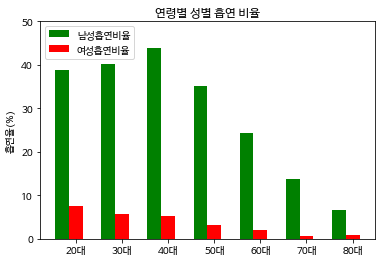

In [46]:
N=7
ind=np.arange(7)-0.3
width=0.3 

fig, ax=plt.subplots()

a2=ax.bar(ind,df_ma_pro, width, label="남성흡연비율",color='g')

xtra_space=0
c2=ax.bar(ind+width+xtra_space,df_fe_pro, width, label="여성흡연비율",color='r')

plt.ylim([0,50])

ax.set_ylabel('흡연율(%)')
ax.set_title('연령별 성별 흡연 비율')
ax.set_xticks(ind+width+xtra_space)
ax.set_xticklabels(('20대','30대','40대','50대','60대','70대','80대'))
plt.legend(loc="upper left")


In [66]:
# 남성 비흡연자
df_ma_non_age=df_ma_non.groupby(df_result['age_group']).mean()
df_ma_non_age=df_ma_non_age.drop(['no','gender'], axis=1)
df_ma_non_age

,height_group,weight_group,waist,eyesight_left,eyesight_right,bp_max,bp_min,bp_gluc,bt_chol,bt_trig,bt_hdl,bt_ldl,bt_mch,bt_crea,bt_ast,bt_alt,bt_rgpt
age_group,,,,,,,,,,,,,,,,,
20대,172.585322,72.644216,82.671480,1.095077,1.088614,121.107822,74.164603,92.469345,184.606463,105.069465,58.035035,106.032464,15.479432,0.975687,25.032014,28.716098,29.466928
30대,172.594082,74.231543,84.971412,1.107211,1.114076,122.346309,76.373743,95.064206,197.269606,131.851049,54.773628,117.021595,15.410988,0.971459,26.025567,32.038638,35.220483
40대,170.157559,72.099271,85.117832,1.089201,1.088472,123.317793,78.517574,99.764888,201.424877,147.251502,52.882899,120.040168,15.312821,0.982663,26.842287,31.669277,42.055181
50대,167.015952,68.518445,84.830475,0.979302,0.981376,125.582137,79.490431,105.459530,196.112041,141.251794,53.836124,115.022156,15.146013,0.987221,27.818780,29.309410,44.402113
60대,164.240874,65.638224,85.201814,0.888654,0.895745,128.497675,78.564156,107.335347,186.869393,129.023240,53.605856,107.881340,14.842040,0.996282,28.637230,27.763886,42.288171
70대,162.810750,63.906308,85.947144,0.845798,0.845536,131.215006,76.583053,107.873087,177.533781,118.858903,53.022770,100.785741,14.393430,1.036320,28.050019,24.204554,38.027622
80대,161.203125,60.218750,85.499688,0.836094,0.792344,131.526563,74.926563,106.385937,170.367188,116.646875,51.046875,96.184664,13.634375,1.086563,25.785937,20.262500,31.645312


In [48]:
# 남성 금연자
df_ma_qui_age=df_ma_qui.groupby(df_result['age_group']).mean()
df_ma_qui_age=df_ma_qui_age.drop(['no','gender'], axis=1)
df_ma_qui_age

,height_group,weight_group,waist,eyesight_left,eyesight_right,bp_max,bp_min,bp_gluc,bt_chol,bt_trig,bt_hdl,bt_ldl,bt_mch,bt_crea,bt_ast,bt_alt,bt_rgpt
age_group,,,,,,,,,,,,,,,,,
20대,173.433030,73.550065,83.020156,1.121977,1.107542,122.377113,74.920676,92.842653,185.713914,114.248375,58.046814,105.280313,15.562679,0.966190,26.081925,29.325098,34.244473
30대,173.108473,75.721802,86.130113,1.114818,1.107152,123.310577,77.039396,96.618996,201.257960,151.939827,54.497302,118.185927,15.429493,0.979709,26.633028,34.449811,44.041015
40대,170.738706,73.557692,86.253304,1.072249,1.084460,124.750038,79.540974,101.920330,203.956044,159.879884,53.776862,119.524778,15.294780,0.978510,27.817308,32.893620,50.176587
50대,167.743156,70.088733,86.086697,0.988797,0.988481,126.078690,79.854038,106.970289,197.544979,154.174553,53.886933,114.202675,15.137799,0.977634,28.455433,29.955846,52.417194
60대,165.293449,67.385502,86.537722,0.906142,0.908462,127.931301,78.363209,108.417956,186.521080,138.844859,53.447225,105.976140,14.903928,0.994237,29.120261,27.902335,46.100394
70대,163.430197,64.377306,86.505656,0.786009,0.814084,130.378727,75.962496,108.209717,177.188192,125.178044,52.573186,100.034154,14.431734,1.023739,27.447109,24.008918,39.798893
80대,161.817376,61.640071,86.603901,0.867553,0.821277,132.007092,73.324468,107.573712,168.882771,113.580817,50.770870,95.529307,13.832504,1.092185,26.415631,20.825933,35.662522


In [49]:
# 남성 비흡연자
df_ma_smo_age=df_ma_smo.groupby(df_result['age_group']).mean()
df_ma_smo_age=df_ma_smo_age.drop(['no','gender'], axis=1)
df_ma_smo_age

,height_group,weight_group,waist,eyesight_left,eyesight_right,bp_max,bp_min,bp_gluc,bt_chol,bt_trig,bt_hdl,bt_ldl,bt_mch,bt_crea,bt_ast,bt_alt,bt_rgpt
age_group,,,,,,,,,,,,,,,,,
20대,172.864865,73.691120,83.562510,1.063707,1.033050,121.705405,74.913514,92.919691,184.496911,129.094981,56.409653,103.785853,15.694595,0.952085,25.782239,31.018147,40.499614
30대,172.706971,75.630305,86.217270,1.094795,1.093515,123.771083,77.973003,97.815918,200.211215,172.815778,53.290525,115.132523,15.638937,0.953430,28.137610,35.435648,54.894532
40대,170.580295,72.813264,85.878327,1.060508,1.059456,124.449782,79.388139,103.611011,204.078329,186.493039,52.194707,117.631624,15.557955,0.951950,28.171538,32.625146,61.480072
50대,167.375244,68.302113,85.171587,0.978789,0.986179,125.528848,79.311404,108.769703,198.095895,173.116422,52.145640,113.156447,15.321396,0.956922,29.124663,29.608780,64.506743
60대,164.817923,64.550498,85.050526,0.885064,0.881451,126.642390,77.549644,111.121764,187.970128,154.708393,52.362447,105.767694,14.987706,0.968677,28.995733,26.171266,62.310384
70대,163.058762,61.752361,84.911542,0.877650,0.803043,128.350472,74.739769,108.038825,178.447009,135.952781,50.629591,100.879328,14.469465,1.025079,26.095488,22.066107,45.642183
80대,159.404762,58.154762,85.064286,0.976190,0.655952,129.428571,73.797619,107.250000,171.964286,135.869048,47.964286,96.440476,13.751190,1.061905,24.250000,17.630952,42.571429


In [50]:
# 여성 비흡연자
df_fe_non_age=df_fe_non.groupby(df_result['age_group']).mean()
df_fe_non_age=df_fe_non_age.drop(['no','gender'], axis=1)
df_fe_non_age

,height_group,weight_group,waist,eyesight_left,eyesight_right,bp_max,bp_min,bp_gluc,bt_chol,bt_trig,bt_hdl,bt_ldl,bt_mch,bt_crea,bt_ast,bt_alt,bt_rgpt
age_group,,,,,,,,,,,,,,,,,
20대,159.777508,53.584630,70.187751,1.005335,0.986961,110.460688,68.962814,88.870685,180.736874,73.865581,69.208678,96.839455,13.212508,0.714414,18.985902,14.416262,15.763977
30대,159.613768,54.943112,73.564250,1.028807,1.018733,111.117584,69.937793,90.237472,187.190323,83.697770,67.191887,103.350877,13.081947,0.704501,19.559615,15.737102,17.461697
40대,157.458848,55.967942,74.825451,0.983428,0.972480,115.567088,72.864529,93.757097,195.385591,96.437669,64.035024,112.111849,12.868144,0.727178,21.218133,17.726659,20.693038
50대,154.742204,55.898426,77.368208,0.885323,0.889787,120.485803,75.163146,98.307826,207.624072,113.149903,62.614657,122.848267,13.311902,0.735784,25.297414,22.573806,25.138793
60대,152.447272,55.616782,80.101348,0.783561,0.788177,125.269449,75.748063,101.562565,200.136719,118.629688,59.630143,116.854369,13.330924,0.748496,26.740039,23.295573,25.508984
70대,150.023057,55.009494,82.658579,0.712049,0.730014,130.583266,75.501085,105.239387,188.634206,124.079072,57.668520,106.254953,13.079181,0.780903,27.131290,21.570402,25.150414
80대,146.679894,51.203704,83.183521,0.774537,0.708995,133.627892,75.259088,105.112722,182.239288,128.384311,55.092287,101.398813,12.684641,0.830784,25.401450,17.973632,23.165458


In [51]:
# 여성 금연자
df_fe_qui_age=df_fe_qui.groupby(df_result['age_group']).mean()
df_fe_qui_age=df_fe_qui_age.drop(['no','gender'], axis=1)
df_fe_qui_age

,height_group,weight_group,waist,eyesight_left,eyesight_right,bp_max,bp_min,bp_gluc,bt_chol,bt_trig,bt_hdl,bt_ldl,bt_mch,bt_crea,bt_ast,bt_alt,bt_rgpt
age_group,,,,,,,,,,,,,,,,,
20대,160.679012,56.061728,77.021728,0.987901,0.974074,112.133333,70.281481,89.353086,182.234568,82.007407,70.824691,94.898765,13.327160,0.702469,19.582716,15.419753,18.407407
30대,159.493056,57.034722,74.406407,1.003338,1.017942,112.067961,71.122053,91.365278,189.958333,97.845833,67.436111,102.973574,13.271944,0.696806,21.706944,18.850000,23.523611
40대,158.828283,57.292929,75.508889,0.992020,0.997475,114.719192,72.460606,93.840404,196.502020,102.288889,65.824242,110.298990,13.052020,0.723939,21.125253,17.325253,24.757576
50대,156.163708,56.607495,77.542801,0.866075,0.874753,118.218935,74.084813,98.934911,205.954635,119.901381,62.897436,119.366337,13.317751,0.725049,28.976331,23.349112,29.834320
60대,153.525180,56.582734,80.423022,0.783453,0.789928,121.841727,73.881295,101.852518,204.438849,123.136691,62.586331,117.294964,13.476978,0.724820,28.276978,25.053957,30.183453
70대,151.447368,58.026316,85.510526,0.876316,0.784211,127.473684,75.250000,106.539474,184.026316,131.565789,55.131579,102.973684,13.488158,0.807895,29.105263,24.000000,24.776316
80대,147.750000,51.500000,84.730000,0.560000,1.080000,135.450000,73.950000,120.550000,178.000000,130.750000,55.000000,96.650000,12.975000,0.805000,25.250000,16.750000,24.200000


In [52]:
# 남성 흡연자
df_fe_smo_age=df_fe_smo.groupby(df_result['age_group']).mean()
df_fe_smo_age=df_fe_smo_age.drop(['no','gender'], axis=1)
df_fe_smo_age

,height_group,weight_group,waist,eyesight_left,eyesight_right,bp_max,bp_min,bp_gluc,bt_chol,bt_trig,bt_hdl,bt_ldl,bt_mch,bt_crea,bt_ast,bt_alt,bt_rgpt
age_group,,,,,,,,,,,,,,,,,
20대,160.106990,57.360913,73.300713,0.921113,0.923823,112.533524,70.099857,89.641940,178.871612,89.604850,69.288160,91.896996,13.492582,0.698146,26.634807,19.225392,21.992867
30대,160.117801,58.134817,75.013743,0.961257,0.950131,113.816754,72.447644,92.687173,187.408377,114.482984,65.534031,100.733596,13.438874,0.711911,20.958115,18.210733,28.091623
40대,158.020735,56.847314,75.892554,0.952780,0.940811,116.393025,74.255419,96.696513,197.368520,130.057493,64.701225,107.403974,13.381150,0.718944,23.983035,21.226202,34.834119
50대,154.938838,54.640673,77.089755,0.822936,0.822018,118.775229,74.568807,100.152905,209.129969,137.504587,61.229358,120.871560,13.647554,0.713303,25.535168,22.928135,35.724771
60대,152.786624,55.764331,81.139809,0.723567,0.691083,121.722930,74.407643,103.121019,202.085987,151.697452,57.302548,115.535032,13.586624,0.767834,26.085987,22.627389,35.984076
70대,150.272727,54.545455,82.280000,0.776364,0.829091,127.490909,74.509091,113.618182,185.563636,136.418182,55.418182,102.555556,13.327273,0.827273,25.345455,19.072727,31.781818
80대,146.000000,49.000000,81.600000,0.520000,0.513333,124.333333,70.733333,100.933333,193.200000,154.000000,53.066667,108.933333,12.960000,0.906667,21.933333,15.000000,25.933333


In [57]:
# 1. 혈압
bp_max_non=df_fe_non_age["bp_max"]
bp_min_non=df_fe_non_age["bp_min"]
bp_max_qui=df_fe_qui_age["bp_max"]
bp_min_qui=df_fe_qui_age["bp_min"]
bp_max_smo=df_fe_smo_age["bp_max"]
bp_min_smo=df_fe_smo_age["bp_min"]

[Text(0, 0, '20대'),
 Text(0, 0, '30대'),
 Text(0, 0, '40대'),
 Text(0, 0, '50대'),
 Text(0, 0, '60대'),
 Text(0, 0, '70대'),
 Text(0, 0, '80대')]

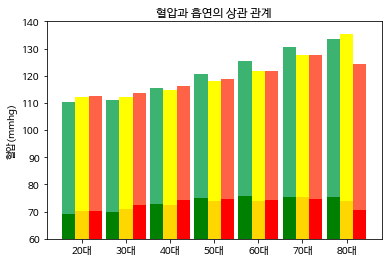

In [58]:
import numpy as np
import matplotlib.pyplot as plt 

N=7
ind=np.arange(7)-0.3
width=0.3 

fig, ax=plt.subplots()
a1=ax.bar(ind,bp_max_non, width, label="비흡연자_수축기혈압",color='mediumseagreen')
a2=ax.bar(ind,bp_min_non, width, label="비흡연자_이완기혈압",color='g')

xtra_space=0
b1=ax.bar(ind+width+xtra_space,bp_max_qui, width, label="금연자_수축기혈압", color='yellow')
b2=ax.bar(ind+width+xtra_space,bp_min_qui, width, label="금연자_이완기혈압",color='gold')

xtra_space_1=0.3
b1=ax.bar(ind+width+xtra_space_1,bp_max_smo, width, label="흡연자_수축기혈압",color='tomato')
b2=ax.bar(ind+width+xtra_space_1,bp_min_smo, width, label="흡연자_이완기혈압",color='r')

plt.ylim([60,140])

ax.set_ylabel('혈압(mmhg)')
ax.set_title('혈압과 흡연의 상관 관계')
ax.set_xticks(ind+width+xtra_space)
ax.set_xticklabels(('20대','30대','40대','50대','60대','70대','80대'))

In [67]:
# 2. 트리 클레세라이드 
bp_tri_non=df_ma_non_age["bt_trig"]
bp_tri_qui=df_ma_qui_age["bt_trig"]
bp_tri_smo=df_ma_smo_age["bt_trig"]

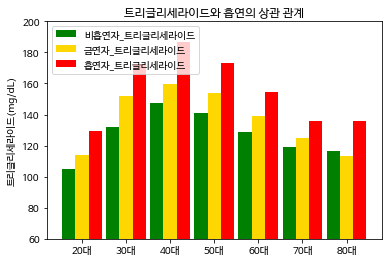

In [68]:
N=7
ind=np.arange(7)-0.3
width=0.3 

fig, ax=plt.subplots()
a1=ax.bar(ind,bp_tri_non, width, label="비흡연자_트리글리세라이드",color='g')

xtra_space=0
b1=ax.bar(ind+width+xtra_space,bp_tri_qui, width, label="금연자_트리글리세라이드", color='gold')

xtra_space_1=0.3
b1=ax.bar(ind+width+xtra_space_1,bp_tri_smo, width, label="흡연자_트리글리세라이드",color='r')

plt.ylim([60,200])

ax.set_ylabel('트리글리세라이드(mg/dL)')
ax.set_title('트리글리세라이드와 흡연의 상관 관계')
ax.set_xticks(ind+width+xtra_space)
ax.set_xticklabels(('20대','30대','40대','50대','60대','70대','80대'))
plt.legend(loc="upper left")

In [70]:
# 콜레스테롤
bp_cho_non=df_ma_non_age["bt_chol"]
bp_cho_qui=df_ma_qui_age["bt_chol"]
bp_cho_smo=df_ma_smo_age["bt_chol"]

In [71]:
# HDL 콜레스테롤
bp_hdl_non=df_ma_non_age["bt_hdl"]
bp_hdl_qui=df_ma_qui_age["bt_hdl"]
bp_hdl_smo=df_ma_smo_age["bt_hdl"]

In [72]:
# LDL 콜레스테롤
bp_ldl_non=df_ma_non_age["bt_ldl"]
bp_ldl_qui=df_ma_qui_age["bt_ldl"]
bp_ldl_smo=df_ma_smo_age["bt_ldl"]

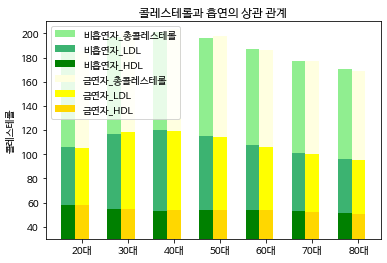

In [73]:
N=7
ind=np.arange(7)-0.3
width=0.3 

fig, ax=plt.subplots()

a3=ax.bar(ind,bp_cho_non, width, label="비흡연자_총콜레스테롤",color='lightgreen')
a1=ax.bar(ind,bp_ldl_non, width, label="비흡연자_LDL",color='mediumseagreen')
a2=ax.bar(ind,bp_hdl_non, width, label="비흡연자_HDL",color='g')

xtra_space=0
b3=ax.bar(ind+width+xtra_space,bp_cho_qui, width, label="금연자_총콜레스테롤", color='lightyellow')
b1=ax.bar(ind+width+xtra_space,bp_ldl_qui, width, label="금연자_LDL", color='yellow')
b2=ax.bar(ind+width+xtra_space,bp_hdl_qui, width, label="금연자_HDL", color='gold')

plt.ylim([30,210])

ax.set_ylabel('콜레스테롤')
ax.set_title('콜레스테롤과 흡연의 상관 관계')
ax.set_xticks(ind+width+xtra_space)
ax.set_xticklabels(('20대','30대','40대','50대','60대','70대','80대'))
plt.legend(loc="upper left")

In [74]:
# 4. 혈색소 
bp_mch_non=df_ma_non_age["bt_mch"]
bp_mch_qui=df_ma_qui_age["bt_mch"]
bp_mch_smo=df_ma_smo_age["bt_mch"]

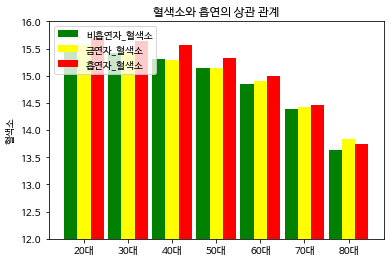

In [75]:
N=7
ind=np.arange(7)-0.3
width=0.3 

fig, ax=plt.subplots()

a3=ax.bar(ind,bp_mch_non, width, label="비흡연자_혈색소",color='g')

xtra_space=0
b3=ax.bar(ind+width+xtra_space,bp_mch_qui, width, label="금연자_혈색소", color='yellow')

xtra_space_1=0.3
c3=ax.bar(ind+width+xtra_space_1,bp_mch_smo, width, label="흡연자_혈색소",color='r')

plt.ylim([12,16])

ax.set_ylabel('혈색소')
ax.set_title('혈색소와 흡연의 상관 관계')
ax.set_xticks(ind+width+xtra_space)
ax.set_xticklabels(('20대','30대','40대','50대','60대','70대','80대'))
plt.legend(loc="upper left")

In [76]:
# 5. 혈청 크레아티닌
bp_crea_non=df_ma_non_age["bt_crea"]
bp_crea_qui=df_ma_qui_age["bt_crea"]
bp_crea_smo=df_ma_smo_age["bt_crea"]

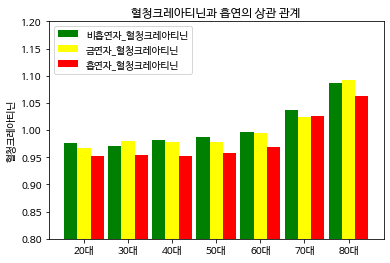

In [77]:
N=7
ind=np.arange(7)-0.3
width=0.3 

fig, ax=plt.subplots()

a3=ax.bar(ind,bp_crea_non, width, label="비흡연자_혈청크레아티닌",color='g')

xtra_space=0
b3=ax.bar(ind+width+xtra_space,bp_crea_qui, width, label="금연자_혈청크레아티닌", color='yellow')

xtra_space_1=0.3
c3=ax.bar(ind+width+xtra_space_1,bp_crea_smo, width, label="흡연자_혈청크레아티닌",color='r')

plt.ylim([0.8,1.2])

ax.set_ylabel('혈청크레아티닌')
ax.set_title('혈청크레아티닌과 흡연의 상관 관계')
ax.set_xticks(ind+width+xtra_space)
ax.set_xticklabels(('20대','30대','40대','50대','60대','70대','80대'))
plt.legend(loc="upper left")

In [78]:
# 혈청지오티(AST.SGOT)
bp_ast_non=df_ma_non_age["bt_ast"]
bp_ast_qui=df_ma_qui_age["bt_ast"]
bp_ast_smo=df_ma_smo_age["bt_ast"]
# 혈청지오티(ALT.SGPT) 
bp_alt_non=df_ma_non_age["bt_alt"]
bp_alt_qui=df_ma_qui_age["bt_alt"]
bp_alt_smo=df_ma_smo_age["bt_alt"]
# 감마지피티 
bp_rgpt_non=df_ma_non_age["bt_rgpt"]
bp_rgpt_qui=df_ma_qui_age["bt_rgpt"]
bp_rgpt_smo=df_ma_smo_age["bt_rgpt"]

### 남성 음주 

In [79]:
df_ma_nd=df_result_ma[df_result_ma['drinking_flag']=='0'] #남자 금주
df_ma_yd=df_result_ma[df_result_ma['drinking_flag']=='1'] #남자 음주
df_fe_nd=df_result_fe[df_result_fe['drinking_flag']=='0'] #남자 금주
df_fe_yd=df_result_fe[df_result_fe['drinking_flag']=='1'] #남자 음주

In [81]:
# 남성 금주
df_ma_nd_age=df_ma_nd.groupby(df_result_ma['age_group']).mean()
df_ma_nd_age

,no,height_group,weight_group,waist,eyesight_left,eyesight_right,bp_max,bp_min,bp_gluc,bt_chol,bt_trig,bt_hdl,bt_ldl,bt_mch,bt_crea,bt_ast,bt_alt,bt_rgpt,gender
age_group,,,,,,,,,,,,,,,,,,,
20대,86908.177529,172.284295,72.911235,82.719119,1.075171,1.062818,120.291744,73.780881,92.392924,182.945996,108.059590,54.466791,107.656055,15.528057,0.968591,24.978274,30.774053,27.297952,1
30대,88936.765732,172.250442,74.521102,85.273869,1.091812,1.102755,122.115774,76.456522,95.735153,196.395754,140.083397,51.227445,118.198682,15.479277,0.985393,25.644933,34.205964,32.952489,1
40대,89577.062524,170.156781,72.329052,85.192218,1.089158,1.092085,122.426143,77.492255,100.262989,200.161156,151.202532,49.780654,121.117714,15.352390,0.982675,26.026072,32.607028,35.955413,1
50대,87373.166548,167.182143,68.688393,85.070214,0.988891,0.981747,123.745581,77.914301,105.396466,193.960014,142.945912,49.964655,116.125179,15.160425,1.013674,26.634952,29.959657,35.996251,1
60대,88209.140719,164.696914,65.793318,85.422790,0.901844,0.900128,126.233662,77.163198,106.673481,183.934660,131.351524,50.035043,107.993421,14.805769,1.027067,27.319584,27.381456,34.066253,1
70대,88423.119074,162.942219,63.364677,85.704768,0.838659,0.855071,130.070845,75.715259,108.462251,175.675661,121.711911,50.306351,101.204198,14.323358,1.055138,26.579722,23.818479,31.942219,1
80대,89622.384193,161.383095,60.537870,85.690670,0.888584,0.807135,131.147091,73.994512,106.665203,169.546652,116.905598,49.691548,96.682418,13.632382,1.100329,25.605928,19.970362,30.488474,1


In [90]:
# 여성 금주
df_fe_nd_age=df_fe_nd.groupby(df_result_fe['age_group']).mean()
df_fe_nd_age

,no,height_group,weight_group,waist,eyesight_left,eyesight_right,bp_max,bp_min,bp_gluc,bt_chol,bt_trig,bt_hdl,bt_ldl,bt_mch,bt_crea,bt_ast,bt_alt,bt_rgpt,gender
age_group,,,,,,,,,,,,,,,,,,,
20대,88571.116964,159.500894,54.087928,71.785173,0.990565,0.972679,110.668155,68.972917,88.705357,181.359524,74.561012,66.398512,100.066111,13.172790,0.704851,19.159821,15.161607,15.189881,2
30대,88561.487874,159.373708,55.032591,74.872141,1.027470,1.014068,110.816582,69.648542,90.036779,187.559924,86.942930,64.947051,105.361891,13.017819,0.701189,19.584654,16.269975,16.476538,2
40대,87963.868823,157.386653,56.003566,74.789503,0.982804,0.973905,115.212891,72.424338,93.507981,195.538122,97.592376,62.143488,113.843174,12.842494,0.731856,21.042961,17.905162,19.325692,2
50대,88195.376569,154.681585,55.736356,77.269069,0.884907,0.888081,120.009042,74.707344,98.309199,207.068371,114.737119,61.458691,123.292654,13.305491,0.734179,25.148647,22.668423,24.094848,2
60대,89049.597536,152.393112,55.579350,80.089251,0.783326,0.788018,125.151288,75.560166,101.700668,199.238530,119.536451,58.890052,116.509138,13.326927,0.751841,26.651967,23.325984,24.922940,2
70대,89076.965350,150.006418,54.997861,82.658058,0.716079,0.732687,130.527164,75.425638,105.305191,188.147176,124.266115,57.372932,106.020120,13.074330,0.782288,27.174558,21.584225,24.957787,2
80대,88647.379242,146.715621,51.171562,83.145224,0.776636,0.710748,133.525684,75.155437,105.408516,182.043247,129.210912,54.982036,101.139055,12.686161,0.832801,25.312043,17.915502,22.982701,2


In [91]:
# 남성 음주 
df_ma_yd_age=df_ma_yd.groupby(df_result_ma['age_group']).mean()
df_ma_yd_age=df_ma_yd_age.drop(['no','gender'], axis=1)
df_ma_yd_age

,height_group,weight_group,waist,eyesight_left,eyesight_right,bp_max,bp_min,bp_gluc,bt_chol,bt_trig,bt_hdl,bt_ldl,bt_mch,bt_crea,bt_ast,bt_alt,bt_rgpt
age_group,,,,,,,,,,,,,,,,,
20대,172.955309,73.231165,83.161610,1.089697,1.071683,121.869290,74.788214,92.782480,185.266759,117.820447,58.349219,104.262719,15.586514,0.964445,25.592842,29.327467,36.536484
30대,172.890833,75.273277,85.842506,1.107260,1.104998,123.406423,77.357313,96.712033,200.113775,156.075322,54.941600,116.027158,15.514576,0.960380,27.393534,33.826096,48.405919
40대,170.640486,73.033325,85.996853,1.065816,1.068870,124.847950,79.777158,102.719064,204.412734,173.949709,53.865539,118.070572,15.435272,0.963062,28.283785,32.418308,58.683017
50대,167.520791,69.191953,85.584018,0.980304,0.987514,126.598861,80.262456,107.966437,198.788133,163.520303,54.642194,113.177169,15.223232,0.955784,29.321696,29.545924,62.366647
60대,164.968596,66.409264,85.995345,0.892485,0.897039,128.741027,78.886272,110.042956,188.867878,144.986765,55.199417,105.581693,14.967575,0.965040,29.948520,27.472746,58.041723
70대,163.358791,64.351621,86.476808,0.803648,0.791082,130.826995,76.403367,107.577618,179.572631,127.005299,54.970698,99.572809,14.535817,0.998628,28.548628,23.812032,49.076060
80대,161.306667,61.080000,86.564267,0.789067,0.770400,132.690667,74.546667,107.689840,170.641711,115.604278,53.235294,94.224599,13.949733,1.056417,26.834225,21.192513,42.871658


In [84]:
# 여성 음주
df_fe_yd_age=df_fe_yd.groupby(df_result_fe['age_group']).count()
df_fe_yd_age

,no,height_group,weight_group,waist,eyesight_left,eyesight_right,bp_max,bp_min,bp_gluc,bt_chol,...,bt_crea,bt_ast,bt_alt,bt_rgpt,gender,age_group,hearing_left,hearing_right,smoke_flag,drinking_flag
age_group,,,,,,,,,,,,,,,,,,,,,
20대,5972,5972,5972,5972,5972,5972,5972,5972,5971,5971,...,5971,5971,5971,5971,5972,5972,5972,5972,5972,5972
30대,7308,7301,7301,7295,7306,7306,7308,7308,7307,7307,...,7307,7307,7307,7307,7308,7308,7308,7308,7308,7308
40대,8772,8771,8771,8771,8769,8769,8772,8772,8772,8772,...,8772,8772,8772,8772,8772,8772,8770,8770,8771,8772
50대,5840,5840,5840,5840,5840,5840,5840,5840,5840,5840,...,5840,5840,5840,5840,5840,5840,5840,5840,5839,5840
60대,2458,2458,2458,2458,2458,2458,2458,2458,2458,2458,...,2458,2458,2458,2458,2458,2458,2458,2458,2457,2458
70대,480,480,480,480,480,480,480,480,480,480,...,480,480,480,480,480,480,480,480,480,480
80대,48,48,48,48,48,48,48,48,48,48,...,48,48,48,48,48,48,48,48,48,48


In [ ]:
#혈압
man_nd=df_ma_nd_age["drinking_flag"]
man_yd=df_ma_yd_age["drinking_flag"]
wom_nd=df_fe_nd_age["drinking_flag"]
wom_yd=df_fe_yd_age["drinking_flag"]

In [ ]:
pro_man=man_yd/(man_yd+man_nd)*100

In [ ]:
pro_wom=wom_yd/(wom_yd+wom_nd)*100

In [ ]:
N=7
ind=np.arange(7)-0.3
width=0.3 

fig, ax=plt.subplots()

a2=ax.bar(ind,pro_man, width, label="남성음주비율",color='g')

xtra_space=0
c2=ax.bar(ind+width+xtra_space,pro_wom, width, label="여성음주비율",color='r')

plt.ylim([0,100])

ax.set_ylabel('음주율(%)')
ax.set_title('연령별 성별 음주 비율')
ax.set_xticks(ind+width+xtra_space)
ax.set_xticklabels(('20대','30대','40대','50대','60대','70대','80대'))
plt.legend(loc="upper left")

In [93]:
# 2. 트리 클레세라이드 
bp_tri_nd=df_ma_nd_age["bt_trig"]
bp_tri_yd=df_ma_yd_age["bt_trig"]

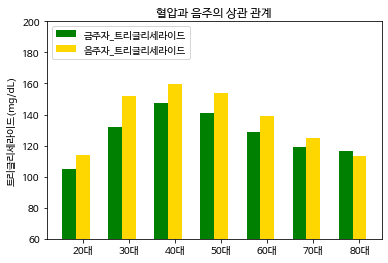

In [94]:
N=7
ind=np.arange(7)-0.3
width=0.3 

fig, ax=plt.subplots()
a1=ax.bar(ind,bp_tri_non, width, label="금주자_트리글리세라이드",color='g')

xtra_space=0
b1=ax.bar(ind+width+xtra_space,bp_tri_qui, width, label="음주자_트리글리세라이드", color='gold')


plt.ylim([60,200])

ax.set_ylabel('트리글리세라이드(mg/dL)')
ax.set_title('혈압과 음주의 상관 관계')
ax.set_xticks(ind+width+xtra_space)
ax.set_xticklabels(('20대','30대','40대','50대','60대','70대','80대'))
plt.legend(loc="upper left")

In [95]:
# 3. 콜레스테롤
# 총콜레스테롤
bp_cho_nd=df_ma_nd_age["bt_chol"]
bp_cho_yd=df_ma_yd_age["bt_chol"]
# HDL 콜레스테롤
bp_hdl_nd=df_ma_nd_age["bt_hdl"]
bp_hdl_yd=df_ma_yd_age["bt_hdl"]
# LDL 콜레스테롤
bp_ldl_nd=df_ma_nd_age["bt_ldl"]
bp_ldl_yd=df_ma_yd_age["bt_ldl"]

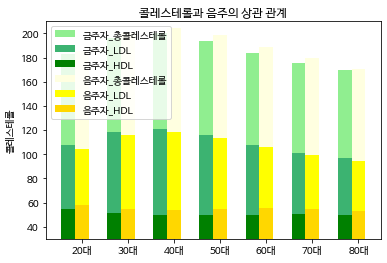

In [96]:
N=7
ind=np.arange(7)-0.3
width=0.3 

fig, ax=plt.subplots()

a3=ax.bar(ind,bp_cho_nd, width, label="금주자_총콜레스테롤",color='lightgreen')
a1=ax.bar(ind,bp_ldl_nd, width, label="금주자_LDL",color='mediumseagreen')
a2=ax.bar(ind,bp_hdl_nd, width, label="금주자_HDL",color='g')

xtra_space=0
b3=ax.bar(ind+width+xtra_space,bp_cho_yd, width, label="음주자_총콜레스테롤", color='lightyellow')
b1=ax.bar(ind+width+xtra_space,bp_ldl_yd, width, label="음주자_LDL", color='yellow')
b2=ax.bar(ind+width+xtra_space,bp_hdl_yd, width, label="음주자_HDL", color='gold')

plt.ylim([30,210])

ax.set_ylabel('콜레스테롤')
ax.set_title('콜레스테롤과 음주의 상관 관계')
ax.set_xticks(ind+width+xtra_space)
ax.set_xticklabels(('20대','30대','40대','50대','60대','70대','80대'))
plt.legend(loc="upper left")

In [97]:
# 4. 혈색소 
bp_mch_nd=df_ma_nd_age["bt_mch"]
bp_mch_yd=df_ma_yd_age["bt_mch"]

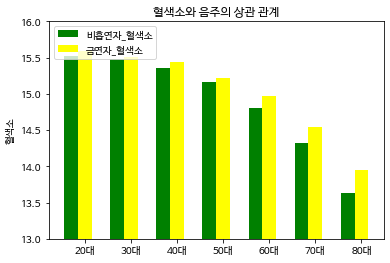

In [98]:
N=7
ind=np.arange(7)-0.3
width=0.3 

fig, ax=plt.subplots()

a3=ax.bar(ind,bp_mch_nd, width, label="비흡연자_혈색소",color='g')

xtra_space=0
b3=ax.bar(ind+width+xtra_space,bp_mch_yd, width, label="금연자_혈색소", color='yellow')

plt.ylim([13,16])

ax.set_ylabel('혈색소')
ax.set_title('혈색소와 음주의 상관 관계')
ax.set_xticks(ind+width+xtra_space)
ax.set_xticklabels(('20대','30대','40대','50대','60대','70대','80대'))
plt.legend(loc="upper left")

In [99]:
# 5. 혈청 크레아티닌
bp_crea_nd=df_ma_nd_age["bt_crea"]
bp_crea_yd=df_ma_yd_age["bt_crea"]

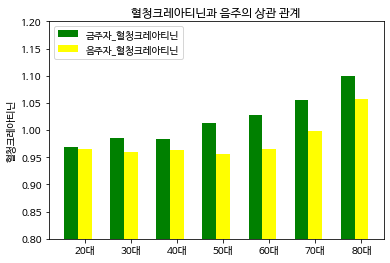

In [100]:
N=7
ind=np.arange(7)-0.3
width=0.3 

fig, ax=plt.subplots()

a3=ax.bar(ind,bp_crea_nd, width, label="금주자_혈청크레아티닌",color='g')

xtra_space=0
b3=ax.bar(ind+width+xtra_space,bp_crea_yd, width, label="음주자_혈청크레아티닌", color='yellow')

plt.ylim([0.8,1.2])

ax.set_ylabel('혈청크레아티닌')
ax.set_title('혈청크레아티닌과 음주의 상관 관계')
ax.set_xticks(ind+width+xtra_space)
ax.set_xticklabels(('20대','30대','40대','50대','60대','70대','80대'))
plt.legend(loc="upper left")

In [101]:
# 6. 혈청지오티(AST.SGOT)
bp_ast_nd=df_ma_nd_age["bt_ast"]
bp_ast_yd=df_ma_yd_age["bt_ast"]
# 7. 혈청지피티(ALT.SGPT) 
bp_alt_nd=df_ma_nd_age["bt_alt"]
bp_alt_yd=df_ma_yd_age["bt_alt"]
# 8. 감마지피티 r
bp_rgpt_nd=df_ma_nd_age["bt_rgpt"]
bp_rgpt_yd=df_ma_yd_age["bt_rgpt"]

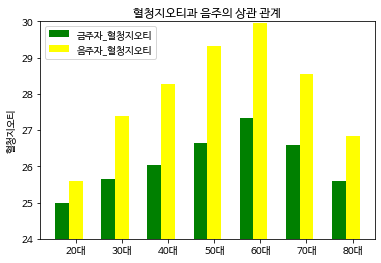

In [102]:
# 6. 혈청지오티(AST.SGOT)

N=7
ind=np.arange(7)-0.3
width=0.3 

fig, ax=plt.subplots()

a3=ax.bar(ind,bp_ast_nd, width, label="금주자_혈청지오티",color='g')

xtra_space=0
b3=ax.bar(ind+width+xtra_space,bp_ast_yd, width, label="음주자_혈청지오티", color='yellow')

plt.ylim([24,30])

ax.set_ylabel('혈청지오티')
ax.set_title('혈청지오티과 음주의 상관 관계')
ax.set_xticks(ind+width+xtra_space)
ax.set_xticklabels(('20대','30대','40대','50대','60대','70대','80대'))
plt.legend(loc="upper left")

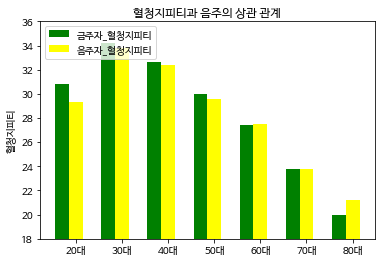

In [104]:
# 7. 혈청지피티(ALT.SGPT) 

N=7
ind=np.arange(7)-0.3
width=0.3 

fig, ax=plt.subplots()

a3=ax.bar(ind,bp_alt_nd, width, label="금주자_혈청지피티",color='g')

xtra_space=0
b3=ax.bar(ind+width+xtra_space,bp_alt_yd, width, label="음주자_혈청지피티", color='yellow')

plt.ylim([18,36])

ax.set_ylabel('혈청지피티')
ax.set_title('혈청지피티과 음주의 상관 관계')
ax.set_xticks(ind+width+xtra_space)
ax.set_xticklabels(('20대','30대','40대','50대','60대','70대','80대'))
plt.legend(loc="upper left")

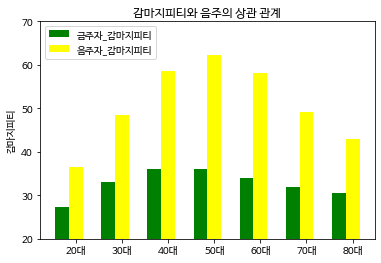

In [105]:
# 7. 감마지피티

N=7
ind=np.arange(7)-0.3
width=0.3 

fig, ax=plt.subplots()

a3=ax.bar(ind,bp_rgpt_nd, width, label="금주자_감마지피티",color='g')

xtra_space=0
b3=ax.bar(ind+width+xtra_space,bp_rgpt_yd, width, label="음주자_감마지피티", color='yellow')

plt.ylim([20,70])

ax.set_ylabel('감마지피티')
ax.set_title('감마지피티와 음주의 상관 관계')
ax.set_xticks(ind+width+xtra_space)
ax.set_xticklabels(('20대','30대','40대','50대','60대','70대','80대'))
plt.legend(loc="upper left")